In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table, vstack
import hdbscan
from pathlib import Path
import seaborn as sns
import glob
import json
%matplotlib inline
sns.set_color_codes()

In [2]:
ROOT_PATH = Path("..") 

In [3]:
table1 = Table.read("Halpha-DR3_errorFlag_3f_16r.ecsv", format="ascii.ecsv")
table2 = Table.read("Halpha-DR3_errorFlag_3f_16r18.ecsv", format="ascii.ecsv")
table3 = Table.read("Halpha-DR3_errorFlag_3f_18r20.ecsv", format="ascii.ecsv")
table4 = Table.read("Halpha-DR3_errorFlag_3f_20r21.ecsv", format="ascii.ecsv")

In [4]:
# Merge tall four tables
table_merge = vstack([table1, table2, table3, table4])
len(table_merge)

9431

In [5]:
# Reading the json files with synthectic photometry of the star library Pickles, A. J. (1998)
def filter_mag(e, s, f1, f2, f3):
    '''
    Calculate the colors using any of set of filters
    '''
    col, col0 = [], []
    if data['id'].endswith(e):
        if data['id'].startswith(str(s)):
            filter1 = data[f1]
            filter2 = data[f2]
            filter3 = data[f3]
            diff = filter1 - filter2
            diff0 = filter1 - filter3
            col.append(diff)
            col0.append(diff0)
    
    return col, col0

def plot_mag(f1, f2, f3):
    x, y = filter_mag("Star", "", f1, f2, f3)
    for a, b in zip(x, y):
        A1.append(a)
        B1.append(b)

In [6]:
A1, B1 = [], []

pattern = "../../MS_stars/*.json"
file_list = glob.glob(pattern)

for file_name in file_list:
    with open(file_name) as f:
        data = json.load(f)
        plot_mag("F0626_rSDSS", "F0660", "F0769_iSDSS")
len(A1)

174

Plotting the results

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


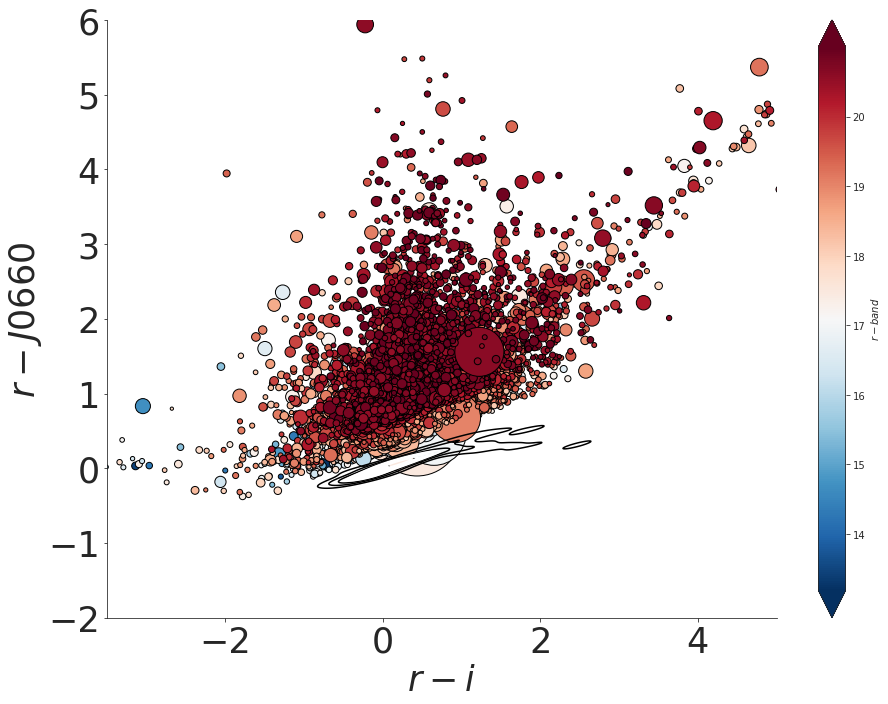

In [7]:
color_palette = sns.color_palette('Paired', 55)
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    plt.xlabel(r"$r - i$", fontsize=35)
    plt.ylabel(r"$r - J0660$", fontsize=35)
    plt.tick_params(axis='x', labelsize=35) 
    plt.tick_params(axis='y', labelsize=35)
    scat = ax.scatter(table_merge["r - i"], table_merge["r - J0660"], s=10*table_merge["FWHM"], edgecolor='black',
                             c=table_merge["R_PStotal"], zorder = 2, cmap='RdBu_r')
    #pal = sns.dark_palette("magma", as_cmap=True)
    #pal = sns.cubehelix_palette(as_cmap=True)
    pal = sns.cubehelix_palette(start=1, rot=0, dark=-10, light=50, reverse=True, as_cmap=True)
    #pal = sns.color_palette("Paired", 19, as_cmap=True)
    #pal = sns.color_palette("bright")
    ax = sns.kdeplot(B1, A1, zorder = 2, cmap=pal);
    #ax2.plot(fit_line, 0.42917 * fit_line - 0.04333, color="k", ls="--")
    ax.set(
      xlim=[-3.5, 5.],
      ylim=[-2.0, 6.])
    fig.colorbar(scat,extend='both', ax=ax).set_label("$r-band$")
    #ax.set_aspect("equal")
    #ax.set_title(r"(r - J0660) vs (r - i)")

# Histograms, KDE, and densities

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


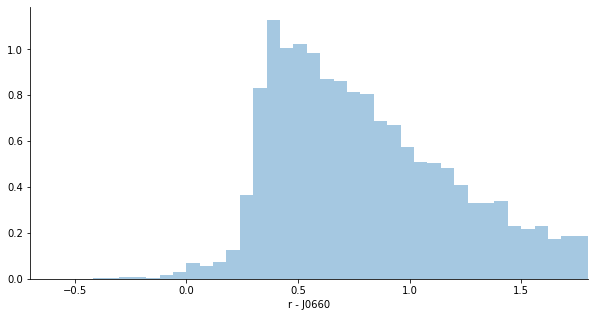

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
label = f", $hhh$"
sns.distplot(table_merge["r - J0660"], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=100, hist_kws=dict(range=[-3.0, 3.0])
                )
ax.set(xlim=[-0.7, 1.8])
#ax.legend(loc='upper left')
sns.despine()

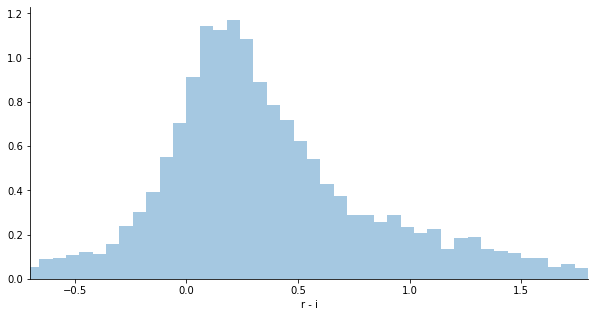

In [9]:
ig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
label = f", $hhh$"
sns.distplot(table_merge["r - i"], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=100, hist_kws=dict(range=[-3.0, 3.0])
                )
ax.set(xlim=[-0.7, 1.8])
#ax.legend(loc='upper left')
sns.despine()

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


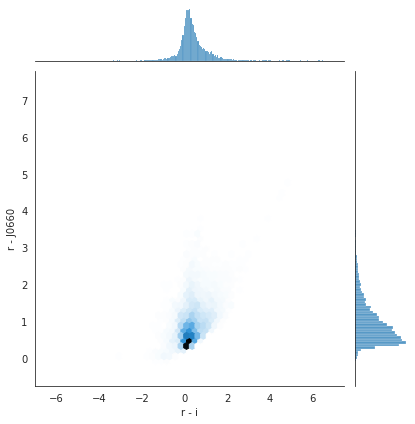

In [10]:

with sns.axes_style('white'):
    sns.jointplot(table_merge["r - i"], table_merge["r - J0660"], kind='hex')

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


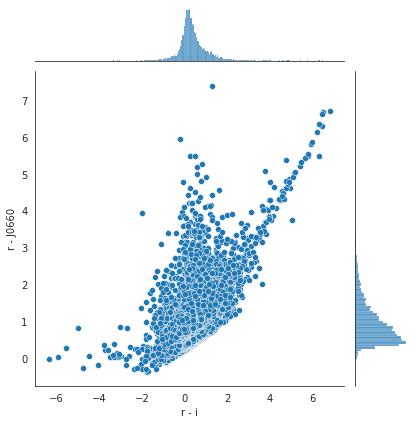

In [11]:
with sns.axes_style('white'):
    sns.jointplot(table_merge["r - i"], table_merge["r - J0660"])#, data, kind='kde');

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_PStotal', ylabel='Density'>

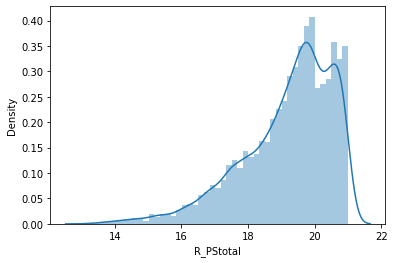

In [12]:
sns.distplot(table_merge["R_PStotal"])

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='r - i', ylabel='Density'>

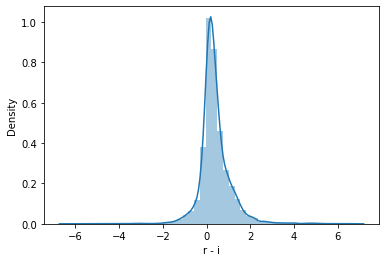

In [13]:
sns.distplot(table_merge["r - i"])

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='r - J0660', ylabel='Density'>

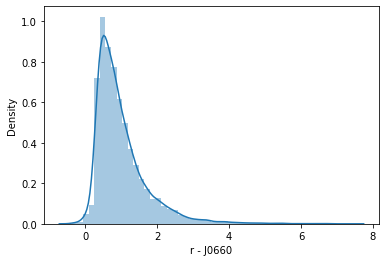

In [14]:
sns.distplot(table_merge["r - J0660"])

In [15]:
df_merge = table_merge.to_pandas()
df_merge.describe()

/home/luis/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarning: converted column 'Unnamed: 0.1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,RA,DEC,FWHM,ISOarea,KRON_RADIUS,nDet_magPStotal,PhotoFlagDet,U_PStotal,F378_PStotal,...,e_R_PStotal,e_F660_PStotal,e_I_PStotal,e_F861_PStotal,e_Z_PStotal,r - i,r - J0660,e(r - i),e(r - J0660),Unnamed: 0.1
count,9.431000e+03,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,...,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,9431.000000,2921.000000
mean,7.106981e+05,189.007067,-21.606602,5.117211,110.042095,4.011026,11.383628,0.593786,31.674912,31.089294,...,0.044949,0.023232,0.047521,0.354548,1.548541,0.386097,0.995201,0.067223,0.051486,218376.023280
std,8.015573e+05,99.363354,16.681682,10.967424,747.676388,1.194738,1.145975,1.008595,26.617460,26.536165,...,0.035370,0.016612,0.043503,12.256805,82.422031,0.739914,0.725443,0.053882,0.037898,181955.918404
min,0.000000e+00,0.352456,-60.062208,0.077710,1.000000,0.000000,4.000000,0.000000,14.166512,14.175274,...,0.001026,0.001018,0.001014,0.001433,0.000910,-6.376337,-0.375387,0.001458,0.001461,1.000000
25%,1.313995e+05,151.719209,-35.485682,2.593621,19.000000,3.305981,11.000000,0.000000,20.195967,19.842464,...,0.016324,0.010666,0.013964,0.019662,0.017911,0.051661,0.512227,0.023288,0.020682,80152.000000
50%,3.561760e+05,162.781381,-25.063370,3.460684,33.000000,3.885464,12.000000,0.000000,21.512670,21.154871,...,0.036022,0.019848,0.033312,0.046339,0.046901,0.272337,0.800443,0.052349,0.042928,179057.000000
75%,1.044017e+06,302.110160,-1.320794,5.363799,67.000000,4.661386,12.000000,2.000000,23.119268,22.573033,...,0.066063,0.032029,0.067025,0.097906,0.103853,0.625304,1.239924,0.098905,0.073801,294670.000000
max,3.470740e+06,359.980041,6.130258,775.388600,37637.000000,15.356410,12.000000,19.000000,99.000000,99.000000,...,0.199751,0.186472,0.199982,1164.718500,7547.641000,6.827015,7.395366,0.266343,0.236894,870618.000000


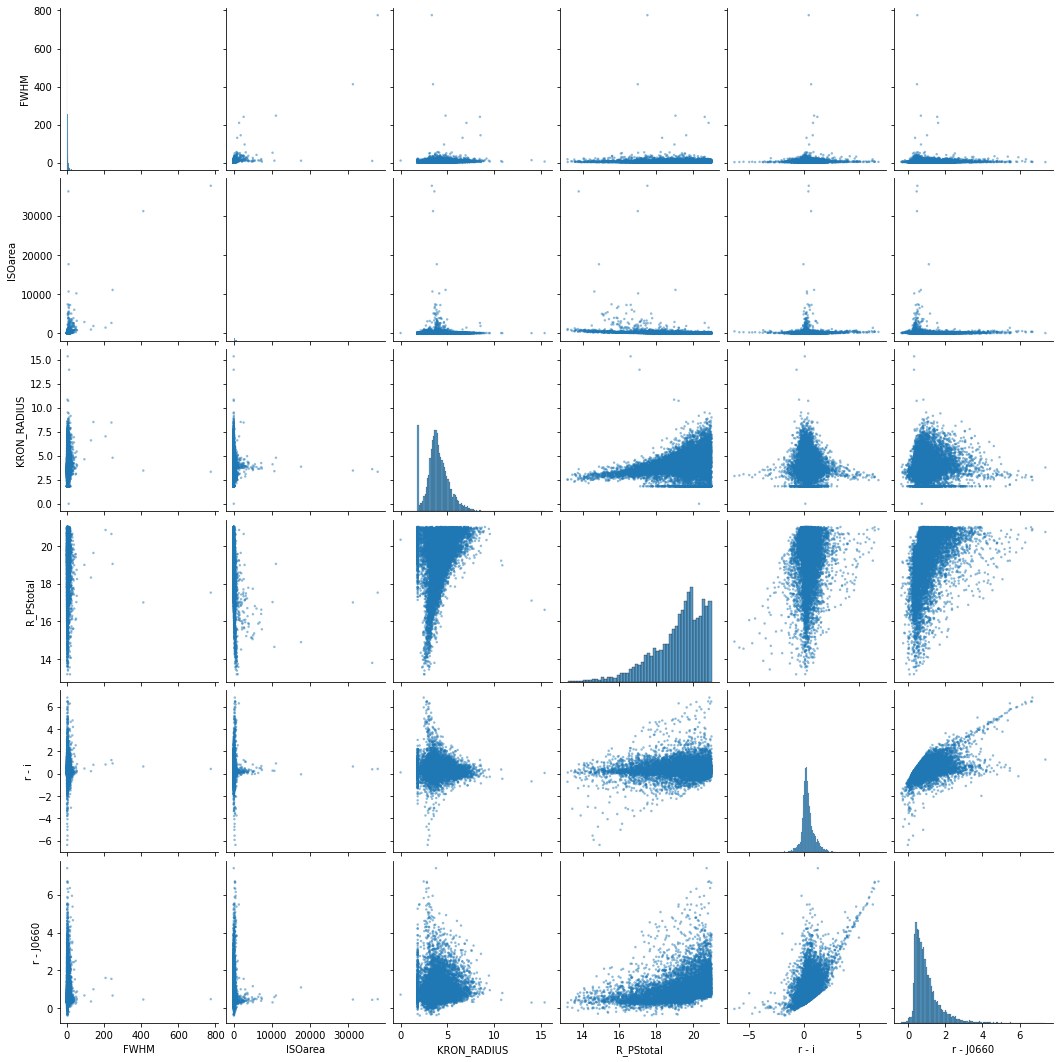

In [16]:
sns.pairplot(df_merge, 
             vars=['FWHM', 'ISOarea', 'KRON_RADIUS', 'R_PStotal', 'r - i', 'r - J0660'],
             plot_kws=dict(alpha=0.5, s=6, edgecolor='none'), 
             diag_kind='hist', palette='RdBu_r'
            )

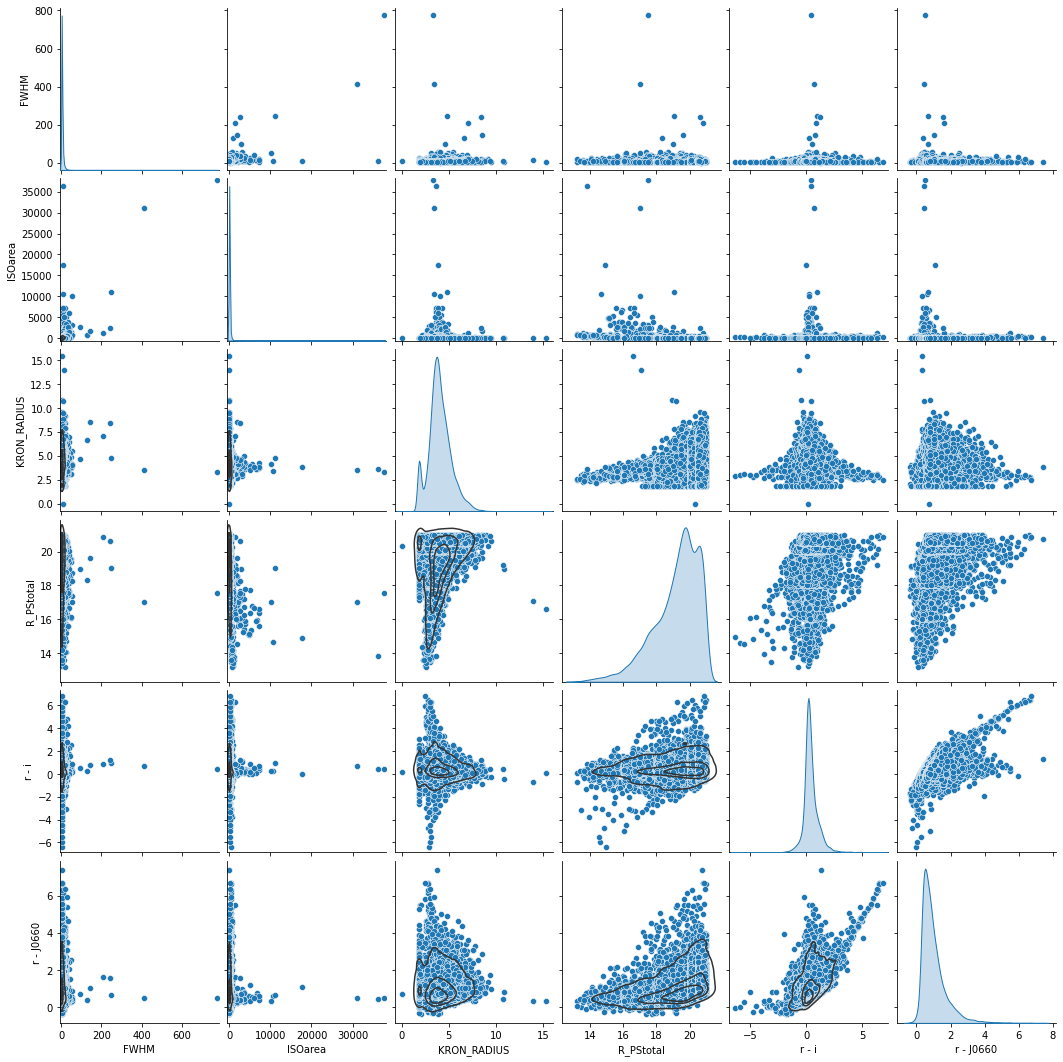

In [17]:
g = sns.pairplot(df_merge, vars=['FWHM', 'ISOarea', 'KRON_RADIUS', 'R_PStotal', 'r - i', 'r - J0660'],
                 diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")